# Неделя 5
*   [Полный User Guide по библиотеке pandas](https://pandas.pydata.org/docs/user_guide/index.html)
*   [Куча полезных рецептов и хороших практик](https://pandas.pydata.org/docs/user_guide/cookbook.html)

Данные iris.csv можно скачать отсюда https://drive.google.com/file/d/1fjyopp9FZ-g6KIsIE8vPX2r62A43h2XI/view?usp=sharing

In [1]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [2]:
import pandas as pd
import numpy as np

### Соединение датафреймов

[Руководство по методам pd.merge, pd.join и pd.concat](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [3]:
iris = pd.read_csv("iris.csv")
iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# pd.concat, pd.merge

Рассмотрим применение метода pd.concat для конкатенации (соединения по осям) на основе датафрейма iris.

In [5]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


pd.concat принимает на вход последовательность датафреймов или серий для соединения. По умолчанию соединение происходит по axis=0, но, конечно, можно произвести и горизонтальное соединение.

In [7]:
# teacher, vertical concat
vertical_concat = pd.concat([iris, iris])
vertical_concat

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Обратите внимание, что индексы не сбрасываются, и теперь мы видим две записи по одному индексу. Чтобы создать новый индекс, необходимо указать параметр ignore_index=True. 

In [8]:
# teacher
# индексы не сбрасываются, если нужно сбросить, используем метод reset_index()
vertical_concat.loc[110]

,sepal.length,sepal.width,petal.length,petal.width,variety
110,6.5,3.2,5.1,2.0,Virginica
110,6.5,3.2,5.1,2.0,Virginica


Либо сбросить индекс уже после соединения

In [9]:
# teacher
# reset_index
vertical_concat.reset_index()

,index,sepal.length,sepal.width,petal.length,petal.width,variety
0,0,5.1,3.5,1.4,0.2,Setosa
1,1,4.9,3.0,1.4,0.2,Setosa
2,2,4.7,3.2,1.3,0.2,Setosa
3,3,4.6,3.1,1.5,0.2,Setosa
4,4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...,...
295,145,6.7,3.0,5.2,2.3,Virginica
296,146,6.3,2.5,5.0,1.9,Virginica
297,147,6.5,3.0,5.2,2.0,Virginica
298,148,6.2,3.4,5.4,2.3,Virginica


In [10]:
# teacher
# показать одну из строк
vertical_concat.reset_index().loc[110]

index                 110
sepal.length          6.5
sepal.width           3.2
petal.length          5.1
petal.width           2.0
variety         Virginica
Name: 110, dtype: object

In [11]:
pd.concat([iris, iris], ignore_index=True)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
295,6.7,3.0,5.2,2.3,Virginica
296,6.3,2.5,5.0,1.9,Virginica
297,6.5,3.0,5.2,2.0,Virginica
298,6.2,3.4,5.4,2.3,Virginica


Аналогично, соединение по горизонтали

In [13]:
# teacher
# horizontal concat
horizontal_concat = pd.concat([iris, iris], axis=1)
horizontal_concat

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica,6.2,3.4,5.4,2.3,Virginica


In [14]:
horizontal_concat['petal.length']

,petal.length,petal.length
0,1.4,1.4
1,1.4,1.4
2,1.3,1.3
3,1.5,1.5
4,1.4,1.4
...,...,...
145,5.2,5.2
146,5.0,5.0
147,5.2,5.2
148,5.4,5.4


Стоит также отметить важный параметр join, который по умолчанию выставлен в 'outer', но может быть выставлен в 'inner'. Этот параметр указывает как поступить с теми индексами, которых нет в одном из датафреймов, участвующих в соединении.

'outer' объединяет (union) датафреймы.

'inner' оставляет только пересечения по индексу.

См. примеры

In [15]:
# teacher
# join outer/inner
pd.concat([iris, iris[:50]], join='outer', axis=1) 

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,NaN,NaN,NaN,NaN,NaN
146,6.3,2.5,5.0,1.9,Virginica,NaN,NaN,NaN,NaN,NaN
147,6.5,3.0,5.2,2.0,Virginica,NaN,NaN,NaN,NaN,NaN
148,6.2,3.4,5.4,2.3,Virginica,NaN,NaN,NaN,NaN,NaN


In [16]:
# teacher
pd.concat([iris, iris[:50]], join='inner', axis=1)

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa,4.9,3.1,1.5,0.1,Setosa


In [17]:
# teacher inner/outer axis=0
pd.concat([iris, iris[['sepal.length', 'petal.length']]], join='outer', axis=0) 

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,NaN,5.2,NaN,NaN
146,6.3,NaN,5.0,NaN,NaN
147,6.5,NaN,5.2,NaN,NaN
148,6.2,NaN,5.4,NaN,NaN


In [18]:
pd.concat([iris, iris[['sepal.length', 'petal.length']]], join='inner', axis=0) 

,sepal.length,petal.length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [21]:
pd.concat([iris[:50], iris[:50]])

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
45,4.8,3.0,1.4,0.3,Setosa
46,5.1,3.8,1.6,0.2,Setosa
47,4.6,3.2,1.4,0.2,Setosa
48,5.3,3.7,1.5,0.2,Setosa


In [22]:
# такое соединение возможно только с неповторяющимися индексами
pd.concat([iris, pd.concat([iris[:50], iris[:50]])], join='inner', axis=1)

InvalidIndexError: ignored

#### pd.merge

pandas имеет полнофункциональные, высокопроизводительные операции соединения в памяти, идиоматически очень похожие на реляционные базы данных, такие как SQL.

Вообще говоря, существует 3 типа соединений
1. внутреннее соединение (inner)
2. левое соединение (left), так остаются строки из левой таблицы, а для неизвестных значений правой выставляется значение NaN
3. правое соеденине (т.е right) так остаются строки из правой таблицы, а для неизвестных значений левой выставляется значение NaN
4. внешнее соединение (т.е outer). кобминация из левого и правого соединения

Для запоминания можно вспоользовать вот этой картинкой. Нужно подчеркнуть, что пересечение и объединение происходит в множестве ключей (колонок), по которым происходит соединение. Так, например, для inner join мы оставляем в результирующей выборке подмножество всевозможных попарных комбинаций строк, с условием, что значения в колонках (ключах) по которым происходит соединение, совпадают.

![joins](https://i.stack.imgur.com/VQ5XP.png)

[Сравнение использования с sql join-ами](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#compare-with-sql-join)


Мы будем работать с методом pd.merge(), так как он является более универсальным, хотя иногда короче использовать метод pd.join()

In [23]:
# разберемся на примере задач
import pandas as pd
import numpy as np

df_left = pd.DataFrame({
    'name': ['Dmitry', 'Sergey', 'Anna'],
    'age': [20, 30, 40]
}, index=['a', 'a', 'b'])

df_right = pd.DataFrame({
    'name': ['Dmitry', 'Sergey', 'Anna', 'Vasiliy'],
    'second_name': ['Petrov', 'Ivanov', 'Smirnova', 'Alexandrov']
}, index=['a', 'b', 'c', 'b'])

In [24]:
df_left

,name,age
a,Dmitry,20
a,Sergey,30
b,Anna,40


In [25]:
df_right

,name,second_name
a,Dmitry,Petrov
b,Sergey,Ivanov
c,Anna,Smirnova
b,Vasiliy,Alexandrov


In [26]:
?pd.merge

У pd.merge есть довольно много параметров, увидев которые в первый раз можно немного выпасть в осадок. Давайте разберемся по порядку.

Первые 2 параметра: left и right. Это левый и правый датафрейм (таблицы), которые будут участвовать в соединении.

left_index и right_index принимают значения True или False. Указывают, использовать ли для левой таблицы индекс в качестве ключа и то же самое для правой. Так, вызов pd.merge(left, right, left_index=True, right_index=True) произведет соединение, где будет происходить проверка на равенство индексов в левой и правой таблице

left_on и right_on используются, когда мы хотим произвести соединение не по индексу, а по колонкам, принимают в качестве значения соответственно названия колонок из левой таблицы и из правой, можно передать сразу несколько названий колонок в списке, но кол-во колонок слева и справа должно совпадать. Таким образом pd.merge(left, right, left_on='A', right_on='B') произведет соединение в котором будет происходить проверка на равенство значений в колонке 'A' левой таблицы и колонки 'B' правой таблицы.

Мы можем комбинировать left_index, right_index и left_on, right_on. Например, использовать в левой таблице в качестве ключа индекс, а в правой колонку 'B': pd.merge(left, right, left_index=True, right_on='B').

Если названия колонок для соединения в обеих таблицах совпадают, то вместо передачи идентичных значений в left_on и right_on, можно просто указать параметр on='<название колонки>'.

Параметр how указывает тип соединения, и может принимать значения 'inner' (по умолчанию), 'outer', 'left' и 'right'.

Любопытно также наличие параметра validate, который делает проверку результирующего датафрейма в зависимости от наших ожиданий результата. Принимает следующие значения:
- “one_to_one” или “1:1”: проверяет, что ключи, использованные в соединении уникальны в левой и правой таблице

- “one_to_many” или “1:m”: Проверяет, что ключи уникальны в левой таблице

- “many_to_one” или “m:1”: Проверяет, что ключи уникальны в правой таблице

- “many_to_many” или “m:m”: можно указать, но при этом не происходит никаких проверок. Ключи могут быть неуникальны в обеих таблицах.

#### Задачи на pd.merge
1. соедините строки первой таблицы со второй по индексу (внутреннее соединение)
2. соедините строки первой таблицы со второй по индексу (левое соединение)
3. соедините строки первой таблицы со второй по индексу (правое соединение)
4. соедините строки первой таблицы со второй по колонке name (внутреннее соединение)
5. соедините строки первой таблицы со второй по колонке name (правое соединение)

In [28]:
df_left

,name,age
a,Dmitry,20
a,Sergey,30
b,Anna,40


In [29]:
df_right

,name,second_name
a,Dmitry,Petrov
b,Sergey,Ivanov
c,Anna,Smirnova
b,Vasiliy,Alexandrov


In [27]:
# 1. соедините строки первой таблицы со второй по индексу (внутреннее соединение)
# если не указываем left_index=True и right_index=True
# Иначе соединение будет происходить по колонкам с одинаковым названием в таблице А и в таблице B

pd.merge(df_left, df_right, left_index=True, right_index=True, how='inner')

,name_x,age,name_y,second_name
a,Dmitry,20,Dmitry,Petrov
a,Sergey,30,Dmitry,Petrov
b,Anna,40,Sergey,Ivanov
b,Anna,40,Vasiliy,Alexandrov


In [30]:
# прочувствуйте разницу
pd.merge(df_left, df_right)

,name,age,second_name
0,Dmitry,20,Petrov
1,Sergey,30,Ivanov
2,Anna,40,Smirnova


In [ ]:
# pd.merge(df_left, df_right, how = "inner", left_index=True, right_index=True )
# то же что и
# df_left.merge(df_right, how = "inner", left_index=True, right_index=True )

In [31]:
df_left.loc["k"] = ['Anatoly', 6]
df_left

,name,age
a,Dmitry,20
a,Sergey,30
b,Anna,40
k,Anatoly,6


In [34]:
df_right

,name,second_name
a,Dmitry,Petrov
b,Sergey,Ivanov
c,Anna,Smirnova
b,Vasiliy,Alexandrov


In [33]:
pd.merge(df_left, df_right, left_index=True, right_index=True, how='inner')

,name_x,age,name_y,second_name
a,Dmitry,20,Dmitry,Petrov
a,Sergey,30,Dmitry,Petrov
b,Anna,40,Sergey,Ivanov
b,Anna,40,Vasiliy,Alexandrov


In [32]:
# 2. соедините строки первой таблицы со второй по индексу (левое соединение)
pd.merge(df_left, df_right, left_index=True, right_index=True, how='left')

,name_x,age,name_y,second_name
a,Dmitry,20,Dmitry,Petrov
a,Sergey,30,Dmitry,Petrov
b,Anna,40,Sergey,Ivanov
b,Anna,40,Vasiliy,Alexandrov
k,Anatoly,6,NaN,NaN


In [35]:
# 3. соедините строки первой таблицы со второй по индексу (правое соединение)
pd.merge(df_left, df_right, left_index=True, right_index=True, how='right')

,name_x,age,name_y,second_name
a,Dmitry,20.0,Dmitry,Petrov
a,Sergey,30.0,Dmitry,Petrov
b,Anna,40.0,Sergey,Ivanov
b,Anna,40.0,Vasiliy,Alexandrov
c,NaN,NaN,Anna,Smirnova


In [36]:
# 4. соедините строки первой таблицы со второй по колонке name (внутреннее соединение)
pd.merge(df_left, df_right, how='inner', left_on='name', right_on='name')

,name,age,second_name
0,Dmitry,20,Petrov
1,Sergey,30,Ivanov
2,Anna,40,Smirnova


In [38]:
pd.merge(df_left, df_right, how='inner', on='name') # если название колонки в левой таблице совподает с названием колонки в правой таблице, 
# то можно опустить параметры left_on и right_on, и использовать просто параметр on.

,name,age,second_name
0,Dmitry,20,Petrov
1,Sergey,30,Ivanov
2,Anna,40,Smirnova


In [39]:
pd.merge(df_left, df_right)

,name,age,second_name
0,Dmitry,20,Petrov
1,Sergey,30,Ivanov
2,Anna,40,Smirnova


In [40]:
# 5. соедините строки первой таблицы со второй по колонке name (правое соединение)
pd.merge(df_left, df_right, how='right', on='name')

,name,age,second_name
0,Dmitry,20.0,Petrov
1,Sergey,30.0,Ivanov
2,Anna,40.0,Smirnova
3,Vasiliy,NaN,Alexandrov


In [41]:
pd.merge(df_left, df_right, how='right')

,name,age,second_name
0,Dmitry,20.0,Petrov
1,Sergey,30.0,Ivanov
2,Anna,40.0,Smirnova
3,Vasiliy,NaN,Alexandrov


In [43]:
df_left

,name,age
a,Dmitry,20
a,Sergey,30
b,Anna,40
k,Anatoly,6


In [44]:
df_right

,name,second_name
a,Dmitry,Petrov
b,Sergey,Ivanov
c,Anna,Smirnova
b,Vasiliy,Alexandrov


In [46]:
pd.merge(df_left, df_right, how='left', on='name', validate='1:1')

,name,age,second_name
0,Dmitry,20,Petrov
1,Sergey,30,Ivanov
2,Anna,40,Smirnova
3,Anatoly,6,NaN


In [51]:
pd.merge(df_left, 
         df_right, 
         left_index=True, 
         right_index=True, 
         how='inner', 
         validate='m:m')

,name_x,age,name_y,second_name
a,Dmitry,20,Dmitry,Petrov
a,Sergey,30,Dmitry,Petrov
b,Anna,40,Sergey,Ivanov
b,Anna,40,Vasiliy,Alexandrov


In [53]:
x = pd.merge(df_left, df_right)
x

,name,age,second_name
0,Dmitry,20,Petrov
1,Sergey,30,Ivanov
2,Anna,40,Smirnova


In [54]:
df_right

,name,second_name
a,Dmitry,Petrov
b,Sergey,Ivanov
c,Anna,Smirnova
b,Vasiliy,Alexandrov


In [55]:
x.merge(df_right, on=['name', 'second_name'])

,name,age,second_name
0,Dmitry,20,Petrov
1,Sergey,30,Ivanov
2,Anna,40,Smirnova


In [56]:
tbl_with_column_repeat = pd.concat([iris, iris[:50]], join='inner', axis=1)
tbl_with_column_repeat

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa,4.9,3.1,1.5,0.1,Setosa


In [57]:
pd.merge(tbl_with_column_repeat, iris)

MergeError: ignored

### Группировка
Очень часто нам необходимо подсчитывать различные параметры и строить графики по группам. Для всего этого существует операция groupby в pandas, и она работает по существу также, как и в SQL.

Руководство по [группировке](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) и [еще одно на хабре](https://habr.com/ru/post/501214/).

In [ ]:
# groupby, max, min, describe, agg, apply

Вот так мы можем произвести группировку по колнке variety и посчитать среднее значения в каждой колонке по группам

In [58]:
# teacher
iris.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


Или максимальные

In [59]:
# teacher
iris.groupby('variety').max()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.8,4.4,1.9,0.6
Versicolor,7.0,3.4,5.1,1.8
Virginica,7.9,3.8,6.9,2.5


Или минимальные

In [60]:
# teacher
iris.groupby('variety').min()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,4.3,2.3,1.0,0.1
Versicolor,4.9,2.0,3.0,1.0
Virginica,4.9,2.2,4.5,1.4


In [63]:
iris.groupby('variety')['sepal.length'].min()

variety
Setosa        4.3
Versicolor    4.9
Virginica     4.9
Name: sepal.length, dtype: float64

Иногда необходимо посчитать разные метрики для разных колонок, используйте для этого метод .agg()

In [64]:
# teacher, agg
iris.groupby('variety').agg({
    'sepal.length': ['max', 'min'],
    'petal.length': ['mean', 'median'],
    'petal.width': 'max'
})

sepal.length      petal.length        petal.width
                    max  min         mean median         max
variety                                                     
Setosa              5.8  4.3        1.462   1.50         0.6
Versicolor          7.0  4.9        4.260   4.35         1.8
Virginica           7.9  4.9        5.552   5.55         2.5

In [65]:
iris.groupby('variety').agg({
    'sepal.length': ['max', 'min'],
    'petal.length': ['mean', 'median'],
    'petal.width': np.max
})

sepal.length      petal.length        petal.width
                    max  min         mean median        amax
variety                                                     
Setosa              5.8  4.3        1.462   1.50         0.6
Versicolor          7.0  4.9        4.260   4.35         1.8
Virginica           7.9  4.9        5.552   5.55         2.5

In [67]:
def my_agg(c):
  return (c**2).mean()

iris.groupby('variety').agg({
    'sepal.length': ['max', 'min'],
    'petal.length': ['mean', 'median'],
    'petal.width': [np.max, my_agg]
})

sepal.length      petal.length        petal.width        
                    max  min         mean median        amax  my_agg
variety                                                             
Setosa              5.8  4.3        1.462   1.50         0.6  0.0714
Versicolor          7.0  4.9        4.260   4.35         1.8  1.7966
Virginica           7.9  4.9        5.552   5.55         2.5  4.1786

Есть даже .describe(), но его вывод выглядит несколько громоздко

In [69]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [72]:
# teacher groupby + describe
iris.groupby('variety').describe()

sepal.length                                              \
                  count   mean       std  min    25%  50%  75%  max   
variety                                                               
Setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal.width         ... petal.length      petal.width         \
                 count   mean  ...          75%  max       count   mean   
variety                        ...                                        
Setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
Versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
variety                                        
Setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
Versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

Обратите внимание, что после того как мы вызвали метод .groupby(), нам возвращается специальный объект DataFrameGroupBy. Для него есть отдельная страничка с доступными методами. После применения одной из агрегирующих функций мы получаем новый датафрейм с которым мы уже умеем работать.

In [70]:
iris.groupby('variety')

Для DataFrameGroupBy есть также и метод apply, по своему поведению похожий на apply для DataFrame

In [ ]:
# teacher, groupby + apply

In [73]:
# teacher
def my_function(gr):
  print(gr)
  return gr

iris.groupby('variety').apply(my_function)
# для каждой подгруппы:
#   положить подгруппу в переменную gr
#   применить преобразования в my_function
#   преобразованную группу вернуть обратно в таблицу (return)

    sepal.length  sepal.width  petal.length  petal.width variety
0            5.1          3.5           1.4          0.2  Setosa
1            4.9          3.0           1.4          0.2  Setosa
2            4.7          3.2           1.3          0.2  Setosa
3            4.6          3.1           1.5          0.2  Setosa
4            5.0          3.6           1.4          0.2  Setosa
5            5.4          3.9           1.7          0.4  Setosa
6            4.6          3.4           1.4          0.3  Setosa
7            5.0          3.4           1.5          0.2  Setosa
8            4.4          2.9           1.4          0.2  Setosa
9            4.9          3.1           1.5          0.1  Setosa
10           5.4          3.7           1.5          0.2  Setosa
11           4.8          3.4           1.6          0.2  Setosa
12           4.8          3.0           1.4          0.1  Setosa
13           4.3          3.0           1.1          0.1  Setosa
14           5.8         

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [74]:
def my_function(gr):
  # смотрю значение колонки varitety в первой строке группы, и в зависимости от этого делаю что-то...
  if gr.iloc[0]['variety'] == 'Setosa':
    gr['sepal.width'] = gr['sepal.width']**2
  if gr.iloc[0]['variety'] == 'Virginica':
    gr['sepal.width'] = gr['sepal.width']**3
  return gr

iris.groupby('variety').apply(my_function)
# для каждой подгруппы:
#   положить подгруппу в переменную gr
#   применить преобразования в my_function
#   преобразованную группу вернуть обратно в таблицу (return)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,12.250,1.4,0.2,Setosa
1,4.9,9.000,1.4,0.2,Setosa
2,4.7,10.240,1.3,0.2,Setosa
3,4.6,9.610,1.5,0.2,Setosa
4,5.0,12.960,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,27.000,5.2,2.3,Virginica
146,6.3,15.625,5.0,1.9,Virginica
147,6.5,27.000,5.2,2.0,Virginica
148,6.2,39.304,5.4,2.3,Virginica


Есть также ряд любопытных методов типа кумулятивной суммы (cumsum) или ранга (rank). Так мы можем присвоить в каждой группе порядковые значения объектам в зависимости от одной из колонок. Бывает очень полезно, например, если вам нужно проследить эволюцию какого-нибудь из параметров в зависимости от номера события во времени.

In [75]:
# teacher rank
iris['sepal.length.rank'] = iris.groupby('variety')['sepal.length'].rank(method='dense')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length.rank
0,5.1,3.5,1.4,0.2,Setosa,9.0
1,4.9,3.0,1.4,0.2,Setosa,7.0
2,4.7,3.2,1.3,0.2,Setosa,5.0
3,4.6,3.1,1.5,0.2,Setosa,4.0
4,5.0,3.6,1.4,0.2,Setosa,8.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,12.0
146,6.3,2.5,5.0,1.9,Virginica,9.0
147,6.5,3.0,5.2,2.0,Virginica,11.0
148,6.2,3.4,5.4,2.3,Virginica,8.0


In [77]:
iris[iris['variety'].isin(['Virginica'])].sort_values('sepal.length')

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length.rank
106,4.9,2.5,4.5,1.7,Virginica,1.0
121,5.6,2.8,4.9,2.0,Virginica,2.0
113,5.7,2.5,5.0,2.0,Virginica,3.0
101,5.8,2.7,5.1,1.9,Virginica,4.0
114,5.8,2.8,5.1,2.4,Virginica,4.0
142,5.8,2.7,5.1,1.9,Virginica,4.0
149,5.9,3.0,5.1,1.8,Virginica,5.0
119,6.0,2.2,5.0,1.5,Virginica,6.0
138,6.0,3.0,4.8,1.8,Virginica,6.0
127,6.1,3.0,4.9,1.8,Virginica,7.0


In [79]:
iris['sepal.length.rn'] = iris.groupby('variety').cumcount() + 1
iris

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.length.rank,sepal.length.rn
0,5.1,3.5,1.4,0.2,Setosa,9.0,1
1,4.9,3.0,1.4,0.2,Setosa,7.0,2
2,4.7,3.2,1.3,0.2,Setosa,5.0,3
3,4.6,3.1,1.5,0.2,Setosa,4.0,4
4,5.0,3.6,1.4,0.2,Setosa,8.0,5
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,12.0,46
146,6.3,2.5,5.0,1.9,Virginica,9.0,47
147,6.5,3.0,5.2,2.0,Virginica,11.0,48
148,6.2,3.4,5.4,2.3,Virginica,8.0,49


#### Мультииндекс
Или многоуровневый индекс. Возникает тогда, когда группировка происходит по нескольким колонкам. Рассмотрим как мы можем работать с ним.

In [80]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.599668,-0.914867
1,bar,one,0.158913,1.174439
2,foo,two,-0.844023,-2.330422
3,bar,three,-1.624895,-1.701594
4,foo,two,-0.723458,-1.376856
5,bar,two,-2.432225,0.603988
6,foo,one,0.641967,-1.094706
7,foo,three,0.370138,0.301476


In [81]:
# teacher groupby a/b + mean
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one    0.158913  1.174439
    three -1.624895 -1.701594
    two   -2.432225  0.603988
foo one    0.620818 -1.004787
    three  0.370138  0.301476
    two   -0.783741 -1.853639

In [82]:
# teacher show index
df.groupby(['A','B']).mean().index

MultiIndex([('bar',   'one'),
            ('bar', 'three'),
            ('bar',   'two'),
            ('foo',   'one'),
            ('foo', 'three'),
            ('foo',   'two')],
           names=['A', 'B'])

In [83]:
# teacher store it
multi_gr = df.groupby(['A','B']).mean()
multi_gr

C         D
A   B                        
bar one    0.158913  1.174439
    three -1.624895 -1.701594
    two   -2.432225  0.603988
foo one    0.620818 -1.004787
    three  0.370138  0.301476
    two   -0.783741 -1.853639

В навигации по loc мы теперь можем передавтаь по строкам 2 значения в кортеже, которые представляют уровни индекса.

In [84]:
# teacher, navigate loc
multi_gr.loc[('foo', 'three')]

C    0.370138
D    0.301476
Name: (foo, three), dtype: float64

In [85]:
multi_gr.loc[('foo', 'three'), 'C']

0.3701380261637691

Без изменений по колонкам, а если бы и там у нас был мультииндекс, то мы тоже могли бы делать выборки, передавая кортежи

In [86]:
# teacher
multi_gr.loc[('foo', 'three'), ['C', 'D']]

C    0.370138
D    0.301476
Name: (foo, three), dtype: float64

In [90]:
iris.groupby('variety').describe().loc['Setosa', [('sepal.length', 'count'), ('sepal.width', 'std')]]

sepal.length  count    50.000000
sepal.width   std       0.379064
Name: Setosa, dtype: float64

In [91]:
multi_gr

C         D
A   B                        
bar one    0.158913  1.174439
    three -1.624895 -1.701594
    two   -2.432225  0.603988
foo one    0.620818 -1.004787
    three  0.370138  0.301476
    two   -0.783741 -1.853639

Однако, pandas не поймет запись типа ('foo', 'one':'three'), поэтому если нас интересует слайсинг по мультииндексу, нужно явно задавать срез с помощью функции [slice()](https://www.programiz.com/python-programming/methods/built-in/slice). На самом деле при указании срезов через двоеточие, происходит инициализация того же самого объекта slice, что и с использованием функции slice(). : является своего рода синтаксическим сахаром.

In [93]:
multi_gr.loc[('foo', 'one':'three')]

SyntaxError: ignored

In [94]:
# teacher slice
multi_gr.loc[('foo', slice('one', 'three')), ['C', 'D']]

C         D
A   B                        
foo one    0.620818 -1.004787
    three  0.370138  0.301476

In [96]:
multi_gr.xs('one', level=1)

,C,D
A,,
bar,0.158913,1.174439
foo,0.620818,-1.004787


In [97]:
multi_gr.xs('foo', level=0)

,C,D
B,,
one,0.620818,-1.004787
three,0.370138,0.301476
two,-0.783741,-1.853639


.iloc тоже работает!

In [99]:
multi_gr

C         D
A   B                        
bar one    0.158913  1.174439
    three -1.624895 -1.701594
    two   -2.432225  0.603988
foo one    0.620818 -1.004787
    three  0.370138  0.301476
    two   -0.783741 -1.853639

In [98]:
# teacher
multi_gr.iloc[1:3]

C         D
A   B                        
bar three -1.624895 -1.701594
    two   -2.432225  0.603988

С помощью методов unstack и stack мы можем распаковывать уровни индекса в колонки и упаковывать обратно в строки

In [100]:
multi_gr

C         D
A   B                        
bar one    0.158913  1.174439
    three -1.624895 -1.701594
    two   -2.432225  0.603988
foo one    0.620818 -1.004787
    three  0.370138  0.301476
    two   -0.783741 -1.853639

In [103]:
# teacher
# распакован первый уровень индекса
multi_gr.unstack(level=1)

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar  0.158913 -1.624895 -2.432225  1.174439 -1.701594  0.603988
foo  0.620818  0.370138 -0.783741 -1.004787  0.301476 -1.853639

In [104]:
# teacher
# распакован нулевой уровень индекса
multi_gr.unstack(level=0)

C                   D          
A           bar       foo       bar       foo
B                                            
one    0.158913  0.620818  1.174439 -1.004787
three -1.624895  0.370138 -1.701594  0.301476
two   -2.432225 -0.783741  0.603988 -1.853639

In [106]:
# teacher unstack + stack
multi_gr.unstack(level=0).stack(level=0)

A             bar       foo
B                          
one   C  0.158913  0.620818
      D  1.174439 -1.004787
three C -1.624895  0.370138
      D -1.701594  0.301476
two   C -2.432225 -0.783741
      D  0.603988 -1.853639

In [109]:
# teacher unstack + stack
# по сути обратная операция
multi_gr.unstack(level=0).stack(level=1).swaplevel(0,1).sort_index()

C         D
A   B                        
bar one    0.158913  1.174439
    three -1.624895 -1.701594
    two   -2.432225  0.603988
foo one    0.620818 -1.004787
    three  0.370138  0.301476
    two   -0.783741 -1.853639

In [110]:
# teacher
# stack to series
multi_gr.stack()

A    B       
bar  one    C    0.158913
            D    1.174439
     three  C   -1.624895
            D   -1.701594
     two    C   -2.432225
            D    0.603988
foo  one    C    0.620818
            D   -1.004787
     three  C    0.370138
            D    0.301476
     two    C   -0.783741
            D   -1.853639
dtype: float64

### Сводные таблицы ([pivot table](http://datareview.info/article/svodnyie-tablitsyi-v-python/))

Возможность создавать сводные таблицы присутствует в электронных таблицах и других программах, оперирующих табличными данными. Сводная таблица принимает на входе данные из отдельных столбцов и группирует их, формируя двумерную таблицу, реализующую многомерное обобщение данных. Чтобы ощутить разницу между сводной таблицей и операцией GroupBy, можно представить себе сводную таблицу, как многомерный вариант агрегации посредством GroupBy. То есть данные разделяются, преобразуются и объединяются, но при этом разделение и объединение осуществляются не по одномерному индексу, а по двумерной сетке.

In [111]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                      'B': ['A', 'B', 'C'] * 4,
                       'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D': np.random.randn(12),
                       'E': np.random.randn(12)})

In [ ]:
# pivot_table(values, index, columns, margins, aggfunc)

Есть следующие параметры
- values значения для агрегации
- index строковый индекс (одна из колонок для группировки)
- columns колоночный индекс (одна из колонок для группировки)
- aggfunc аггрегационная функция
- margins добавлять ли "Итог"

In [112]:
df

,A,B,C,D,E
0,one,A,foo,-0.185819,1.008429
1,one,B,foo,-0.515676,1.803096
2,two,C,foo,-0.581722,-2.746695
3,three,A,bar,-0.430511,1.494227
4,one,B,bar,-0.646759,-1.145978
5,one,C,bar,-1.002846,-0.454893
6,two,A,foo,-2.099286,0.417739
7,three,B,foo,-1.987464,1.428099
8,one,C,foo,-0.261449,-1.232316
9,one,A,bar,0.975607,0.473466


In [115]:
# teacher
pd.pivot_table(df, values='E', index='A', columns='B', aggfunc='mean')

B,A,B,C
A,,,
one,0.740948,0.328559,-0.843605
three,1.494227,1.428099,0.529457
two,0.417739,1.113948,-2.746695


**Как получить такой же результат с помощью groupby + unstack?**

In [118]:
# ваш код тут
df.groupby(['A', 'B'])['E'].mean().unstack(level=1)

B,A,B,C
A,,,
one,0.740948,0.328559,-0.843605
three,1.494227,1.428099,0.529457
two,0.417739,1.113948,-2.746695


In [119]:
pd.pivot_table(df, values='E', index=['A','C'], columns='B', aggfunc='mean')

B                 A         B         C
A     C                                
one   bar  0.473466 -1.145978 -0.454893
      foo  1.008429  1.803096 -1.232316
three bar  1.494227       NaN  0.529457
      foo       NaN  1.428099       NaN
two   bar       NaN  1.113948       NaN
      foo  0.417739       NaN -2.746695

margins дает нам дополнительную сводку по всем группам

In [120]:
# teacher
pd.pivot_table(df, values='E', index='A', columns='B', aggfunc='mean', margins=True)

B,A,B,C,All
A,,,,
one,0.740948,0.328559,-0.843605,0.075301
three,1.494227,1.428099,0.529457,1.150594
two,0.417739,1.113948,-2.746695,-0.405003
All,0.848465,0.799791,-0.976112,0.224048


In [ ]:
# teacher

 К сожалению, нельзя применить при агрегации одну функцию, а при своде применить другую. Но мы можем обойти это ограничение вручную.

In [125]:
# как?
# Как добавить произвольные итоги к сводной таблице?
pvt = pd.pivot_table(df, values='E', index='A', columns='B', aggfunc='max')
pvt['All_sum'] = pvt.sum(axis=1)
pvt.loc['All_sum'] = pvt.sum(axis=0)
# All_sum и новый индекс All_sum. В колонке будет посчитана сумма по строчкам
# в новой строке будет посчитана сумма по колонкам в своде.
# teacher
pvt

B,A,B,C,All_sum
A,,,,
one,1.008429,1.803096,-0.454893,2.356632
three,1.494227,1.428099,0.529457,3.451783
two,0.417739,1.113948,-2.746695,-1.215008
All_sum,2.920395,4.345143,-2.672130,4.593408


### Графика (plotting)
Pandas использует внутри себя matplotlib, чтобы рисовать графики напрямую из таблиц.

Несколько основных правил:


1.   По умолчанию для значений по оси x используется индекс
2.   По умолчанию рисует все колонки
3.   Можно передавать некоторые параметры для кастомизации, не задавая явно объекты figure и ax
4.   Можно строить графики напрямую над объектами DataFrameGroupBy, но по умолчанию графики будут строиться на разных "полотнах". Чтобы нарисовать все на одном, нужно явно передавать параметр ax



In [126]:
df

,A,B,C,D,E
0,one,A,foo,-0.185819,1.008429
1,one,B,foo,-0.515676,1.803096
2,two,C,foo,-0.581722,-2.746695
3,three,A,bar,-0.430511,1.494227
4,one,B,bar,-0.646759,-1.145978
5,one,C,bar,-1.002846,-0.454893
6,two,A,foo,-2.099286,0.417739
7,three,B,foo,-1.987464,1.428099
8,one,C,foo,-0.261449,-1.232316
9,one,A,bar,0.975607,0.473466


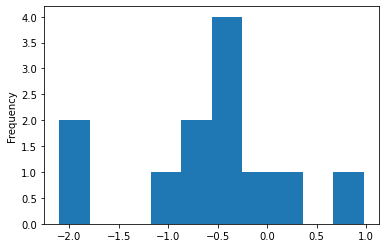

In [127]:
df['D'].plot(kind='hist')

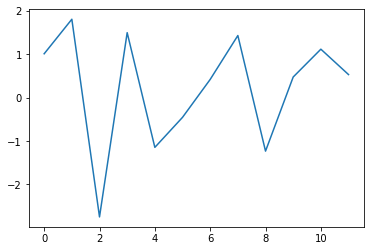

In [128]:
# иллюстрация правил выше
# 1.
df['E'].plot()

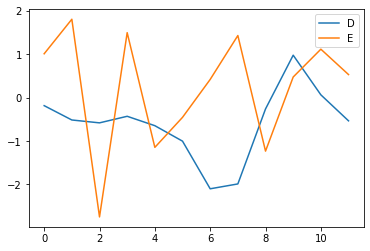

In [129]:
df[['D','E']].plot()

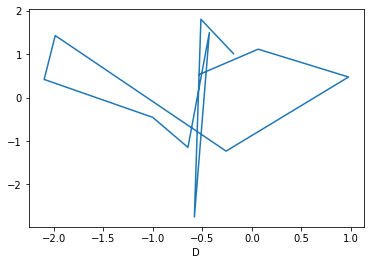

In [130]:
df.set_index('D')['E'].plot()

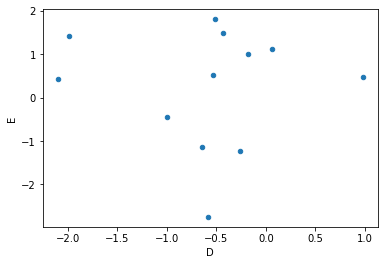

In [131]:
df.plot.scatter(x='D', y='E')

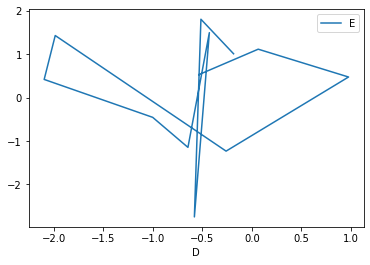

In [132]:
df.plot(x='D', y='E')

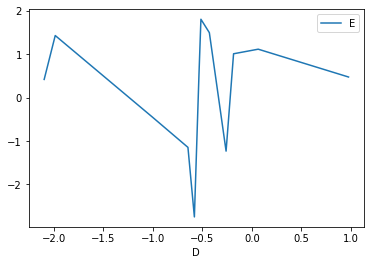

In [133]:
df.sort_values('D').plot(x='D', y='E')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb312cedb20>,
      dtype=object)

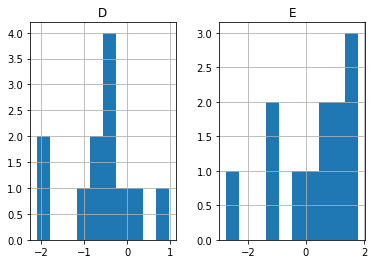

In [134]:
# 2.
df[['D', 'E']].hist() # .plot(kind='hist')

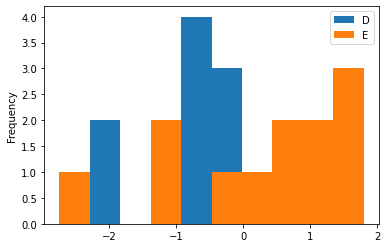

In [135]:
df[['D', 'E']].plot(kind='hist')

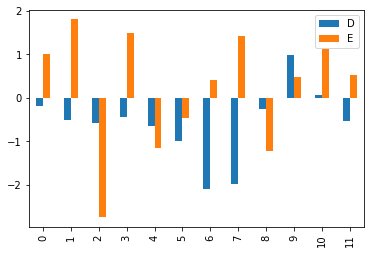

In [136]:
df[['D', 'E']].plot(kind='bar')

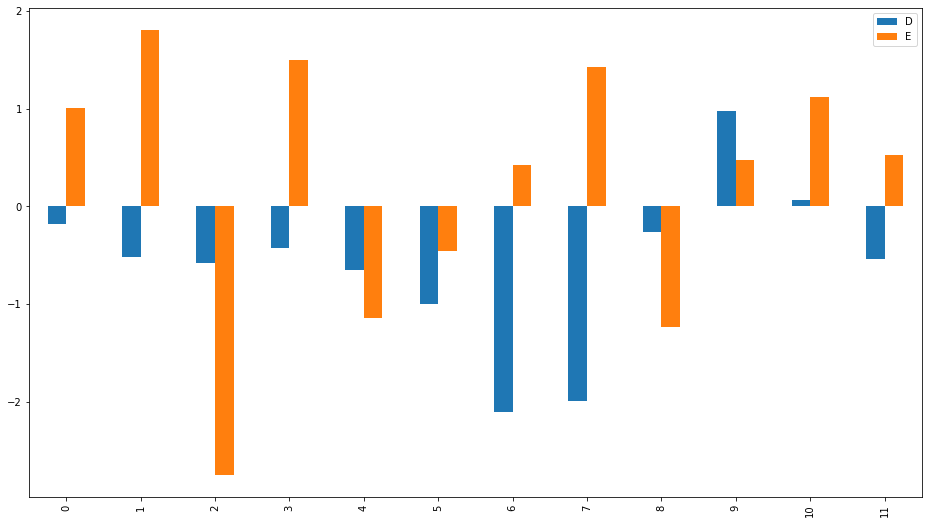

In [137]:
# 3. можем передавать все те же параметры, что и для plt.figure
df[['D', 'E']].plot(kind='bar', figsize=(16,9))

(2,)


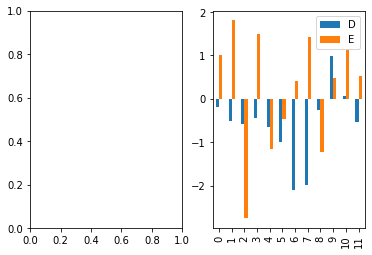

In [138]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,2)
print(ax.shape)
df[['D', 'E']].plot(kind='bar', ax=ax[1])

A
one      AxesSubplot(0.125,0.125;0.775x0.755)
three    AxesSubplot(0.125,0.125;0.775x0.755)
two      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

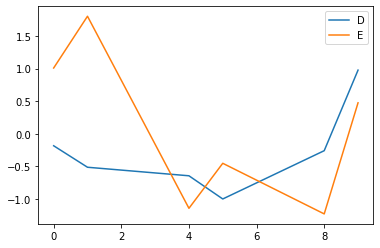

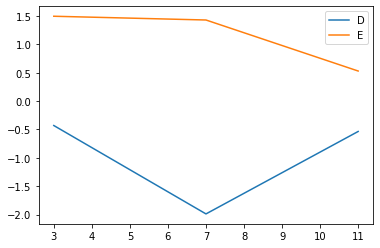

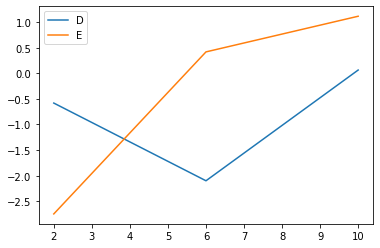

In [140]:
from matplotlib import pyplot as plt
# 4.
df[['A', 'D', 'E']].groupby('A').plot() # три графика для разных групп

A
one      AxesSubplot(0.125,0.125;0.775x0.755)
three    AxesSubplot(0.125,0.125;0.775x0.755)
two      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

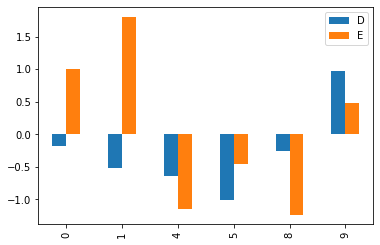

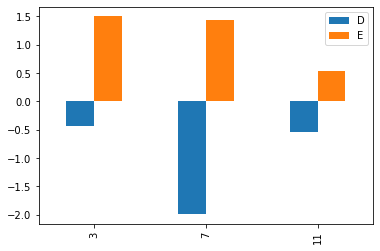

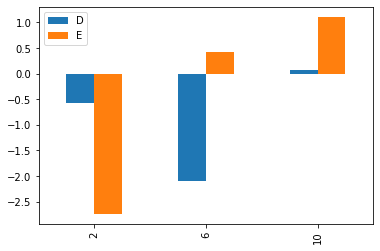

In [141]:
df[['A', 'D', 'E']].groupby('A').plot(kind='bar') # три графика для разных групп

A
one      AxesSubplot(0.125,0.125;0.775x0.755)
three    AxesSubplot(0.125,0.125;0.775x0.755)
two      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

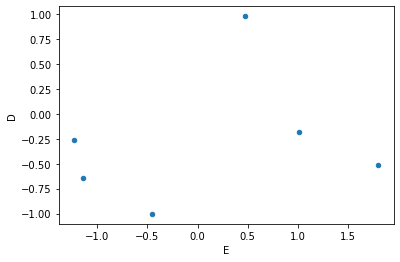

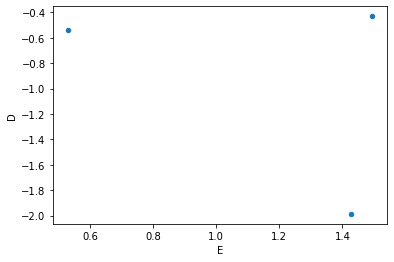

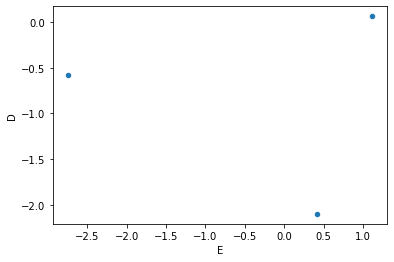

In [142]:
df[['A', 'D', 'E']].groupby('A').plot(kind='scatter', x='E', y='D') # три графика для разных групп

A
one      AxesSubplot(0.125,0.125;0.775x0.755)
three    AxesSubplot(0.125,0.125;0.775x0.755)
two      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

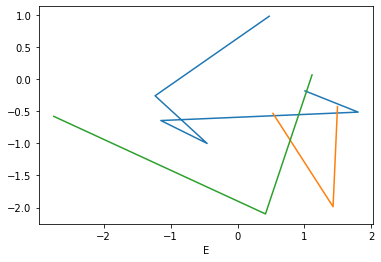

In [143]:
fig, ax = plt.subplots()
df.groupby('A').plot(x='E', y='D', ax=ax, legend=False) # 

[Understanding pandas plot](http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/)

## Отток клиентов телеком компании
### Что такое "скорость оттока"?

Коэффициент оттока - это процент подписчиков на услугу, которые прекращают свою подписку на услугу в течение заданного периода времени. Для того чтобы компания могла расширить свою клиентуру, ее темпы роста, измеряемые числом новых клиентов, должны превышать темпы оттока. Этот показатель обычно выражается в процентах.

### Почему отток так важен?

Отток клиентов - это термин, используемый в компаний с подписочной моделью ведения бизнеса, для описания потери клиентов. Например, если 10 из 100 подписчиков интернет-провайдера (ISP) отменили свои подписки, скорость оттока для этого провайдера составит 10%.

Отток важен, потому что он напрямую влияет на прибыльность вашего сервиса. Принято считать, что прибыльность услуги напрямую связана с ростом ее клиентской базы. Это может привести владельцев бизнеса к выводу, что для того, чтобы увеличить свою клиентскую базу, скорость приобретения новых клиентов должна превышать скорость оттока.

### Что из себя представляет датасет?

Датасет представляет из себя 3333 записи из истории компании о клиентах с 20 колонками. Каждая колонка описывает клиента - его штат проживания, время использования услуги, номер, перечень подписок, время разговора, прочее.

##### Более конкретно
-   State: штат США, в котором проживает клиент, обозначенный двухбуквенным сокращением; например, OH или NJ
-   Account Length: количество дней, в течение которых этот аккаунт был активным
-   Area Code: трехзначный код города соответствующего номера телефона клиента
-   Phone: оставшийся семизначный номер телефона
-   Int’l Plan: есть ли у клиента международный тарифный план: да / нет
-   VMail Plan: есть ли у клиента функция голосовой почты: да / нет
-   VMail Message: предположительно среднее количество сообщений голосовой почты в месяц
-   Day Mins: общее количество минут, использованных в течение дня
-   Day Calls: общее количество звонков за день
-   Day Charge: оплачиваемая стоимость дневных звонков
-   Eve Mins, Eve Calls, Eve Charge: оплачиваемая стоимость звонков, сделанных в течение вечера
-   Night Mins, Night Calls, Night Charge: оплачиваемая стоимость звонков в ночное время
-   Intl Mins, Intl Calls, Intl Charge: расчетная стоимость международных звонко
-   CustServ Calls: количество звонков в службу поддержки
-   Churn?: клиент ушёл: да / нет

### Exploratory data analysis
Поработаем еще немного с pandas, любой анализ начинается с осмотра данных, мы уже обсуждали с вами пропуски и выбросы, а также типы данных, все это является частью этого анализа. Помимо этого, на этом этапе мы можем выдвигать определенные гипотезы, и пытаться провалидировать их с помощью графиков и таблиц. Если нашей целью является построение модели для предсказания какой-то переменной (об этом мы будем говорить позднее в нашем курсе), то на этапе осмотра данных, мы можем попытаться сформулировать некие эвристики, которые помогут сформировать нам базовое решение (так называемый baseline), от которого мы сможем отталкиваться при построении моделей. Помимо этого, на этом этапе мы можем обнаружить, что некоторые признаки явно не влияют на целевую переменную или по ним представлено мало статистики, что будет говорить о том, что мы можем данные признаки не рассматривать в дальнейшем, так как от них нет никакой пользы, либо решающее правило, сформированное по ним будет очень неточным.

[Данные](https://drive.google.com/file/d/1PPx68Oi3DwgC97vwfBvVsD3SHK8p8-H0/view?usp=sharing)

Начнем с загрузки данных, а также с первичного осмотра

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option("display.precision", 2)

In [145]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [146]:
df.shape

(3333, 21)

In [147]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [149]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


Обратите внимание, что describe() по умолчанию приводит статистику только для числовых полей, мы можем изменить это поведение, добавив в рассмотрение дополнительные типы данных. Это можно сделать с помощью параметра include.

In [151]:
df.describe(include=['object', 'bool'])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,382-4657,no,no,False
freq,106,1,3010,2411,2850


Посмотрим на соотношение между ушедшими и оставшимися клиентами. Забегая вперед, дисбаланс классов, это важный момент, который необходимо учитывать при построении моделей.

In [152]:
# задача / teacher
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [153]:
# задача / teacher
df['churn'].value_counts(normalize=True)

False    0.86
True     0.14
Name: churn, dtype: float64

Если бы мы с вами делали классификатор, то мы могли бы сказать, что нам нужна точность (процент правильных ответов), по крайней мере выше, чем 0.86, поскольку мы можем достигнуть такого качества просто присваивая всем объектом значение перемнной 'churn', равное False.

Попробуем руками найти факторы, влияющие на отток клиентов

Какова максимальная продолжительность международных звонков среди постоянных пользователей (Churn == 0), у которых нет международного плана?

In [154]:
# задача / teacher
df[(df['churn'] == 0) & (df['international plan'] == 'no')]['total intl minutes'].max()

18.9

А каково соотношение ушедших и не ушедших среди тех, кто пользуется и не пользуется международным планом?

In [155]:
# задача / teacher
pd.crosstab(df['churn'], df['international plan'])

international plan,no,yes
churn,,
False,2664,186
True,346,137


In [156]:
pd.crosstab(df['churn'], df['international plan'], normalize=True)

international plan,no,yes
churn,,
False,0.8,0.06
True,0.1,0.04


In [157]:
0.1/0.8

0.125

In [158]:
0.04/0.06

0.6666666666666667

In [159]:
# задача / teacher
pd.crosstab(df['churn'], df['voice mail plan'], normalize=True)

voice mail plan,no,yes
churn,,
False,0.60,0.25
True,0.12,0.02


Различаются ли длительности звонков в разных географических зонах?

In [161]:
# задача / teacher
df.pivot_table(['total day calls', 'total eve calls', 'total night calls'],
               ['area code'], aggfunc='mean')

,total day calls,total eve calls,total night calls
area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

То же, мы можем отобразить на столбчатой диаграмме

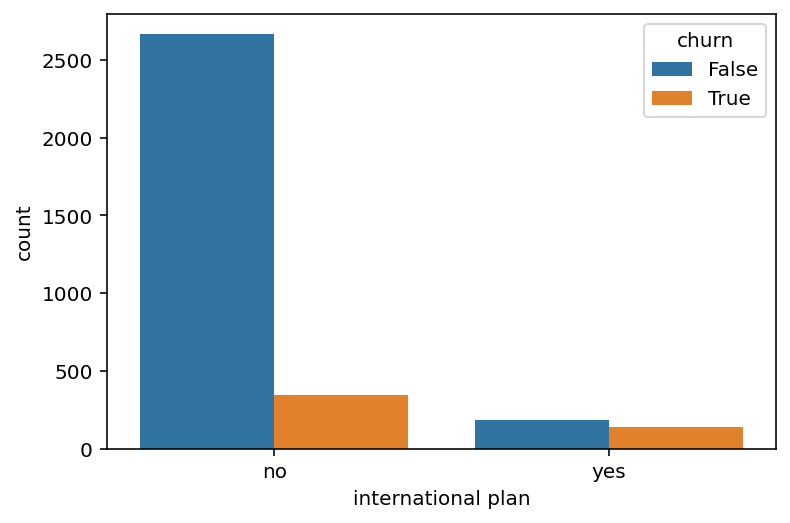

In [163]:
sns.countplot(x='international plan', hue='churn', data=df)

Посмотрим, влияет ли кол-во звонков в сервис от клиента на шанс ухода

In [164]:
# задача / teacher
# crosstab
pd.crosstab(df['churn'], df['customer service calls'], margins=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


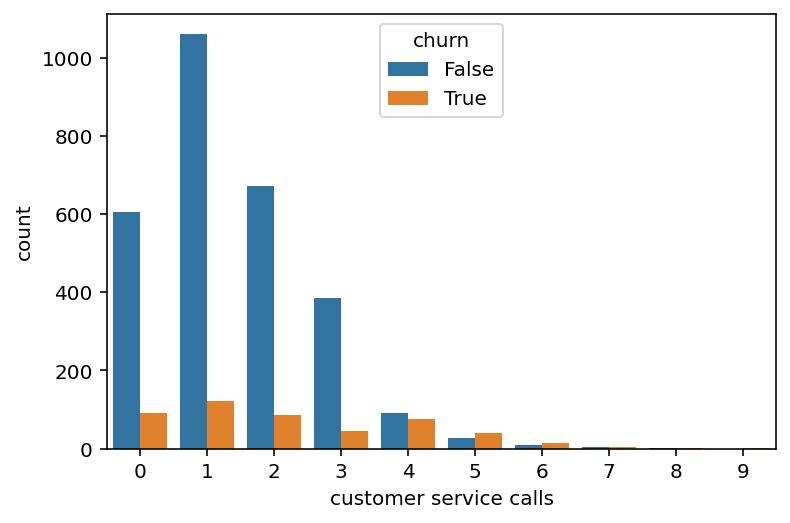

In [165]:
# задача / teacher
# sns.countplot
sns.countplot(x='customer service calls', hue='churn', data=df)

Мы видим, что чем больше становится звонков в сервис, тем больше процентное соотношение ушедших в категории

Сделаем специальную бинарную колонку, скажем, что больше 3 звонков это "много"

In [166]:
df['many_service_calls'] = (df['customer service calls'] > 3).astype('int')

pd.crosstab(df['many_service_calls'], df['churn'], margins=True)

churn,False,True,All
many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


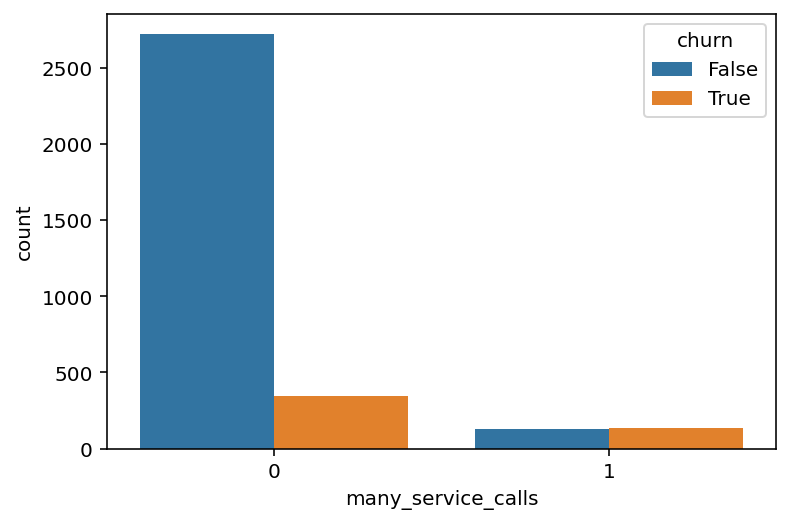

In [167]:
sns.countplot(x='many_service_calls', hue='churn', data=df)

Данный график также показывает изменение соотношения

Теперь давайте составим простое решающее правило. Если у клиента много звонков в сервис, И при этом у него есть международный план, будем говорить, что он уйдет, в противном случае (т.е даже когда не выполняется одно из условий), будем говорить, что он останется.

In [171]:
# задача / teacher

pd.crosstab(df['many_service_calls'] & df['international plan'].replace({'yes': 1, 'no': 0}), df['churn'])

# 85.8% > 85.5%.  # процент правильных ответов чуть-чуть стал больше

churn,False,True
row_0,,
0,2841,464
1,9,19


Мы немного процент правильных ответов относительно правила "выставлять клиенту всегда метку не уйдёт".

Подобное занятие также можно назвать "машинное обучение руками".

#### Задание
Разбить колонку total eve charge на несколько интервалов, и проверить в каждом интервале соотношение между ушедшими людми и оставшимися

In [ ]:
df['total eve charge'].hist()

1. разбить total eve charge на квантили или какие-то интервалы
2. И для каждого интервала посчитать кол-во ушедших и оставшихся
3. Построить количественный график
4. Построить график, отражающий отношение ушедших ко всем объектам в группе

In [ ]:
# 1.

In [ ]:
# 2.

In [ ]:
# 3.

In [ ]:
# 4.